In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib notebook

In [3]:
def lorenz(t, X, sigma, beta, rho):
    #The Lorenz equations
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

In [4]:
#Lorenz attracor values
t_end = 10
t = np.linspace(0, t_end, 1000)
sigma_val = 10
beta_val = 8/3
rho_val = 28

#initializing values
u0, v0, w0 = 10,10,10
x0 = np.array([u0,v0,w0])

# Integrate the Lorenz equations.
soln = solve_ivp(lorenz, (0, t_end), x0, args=(sigma_val, beta_val, rho_val),dense_output=True)
x, y, z = soln.sol(t)

<IPython.core.display.Javascript object>


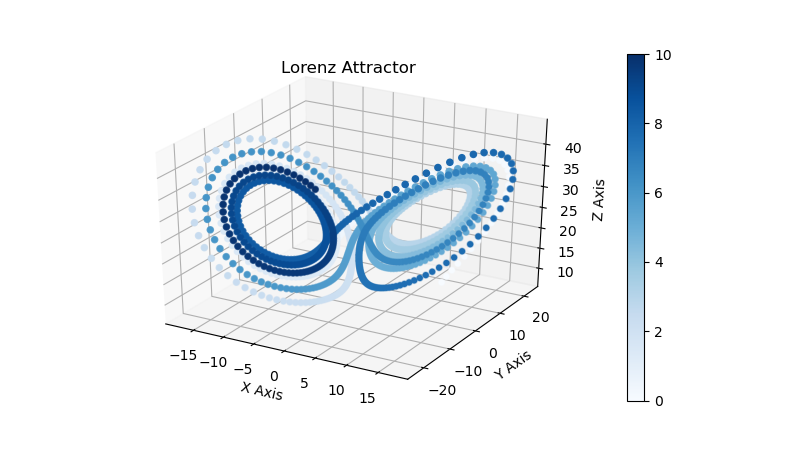

In [89]:
# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig = plt.figure(figsize=(8, 4.5))
ax = fig.gca(projection='3d')

sc = ax.scatter(x, y, z, c=t,cmap='Blues')
    
#ax.scatter(x,y,z,c=t,cmap='coolwarm')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.colorbar(sc)

<IPython.core.display.Javascript object>


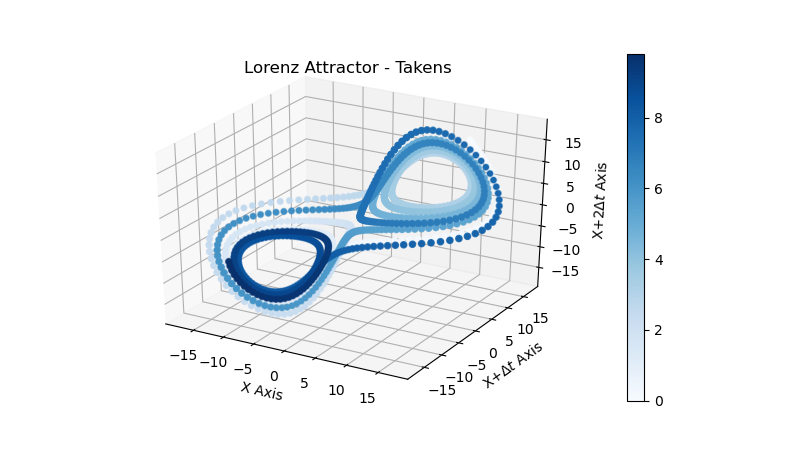

0.10010010010010009


In [90]:
fig = plt.figure(figsize=(8, 4.5))
ax = fig.gca(projection='3d')

dt = 10*t[1]
print(dt)
n = int(dt/t[1])
sc = ax.scatter(x[:-2*n], x[n:-n], x[2*n:], c=t[:-2*n],cmap='Blues')
    
#ax.scatter(x,y,z,c=t,cmap='coolwarm')
ax.set_xlabel("X Axis")
ax.set_ylabel("X+$\Delta t$ Axis")
ax.set_zlabel("X+$2\Delta t$ Axis")
ax.set_title("Lorenz Attractor - Takens")

plt.colorbar(sc)

<IPython.core.display.Javascript object>


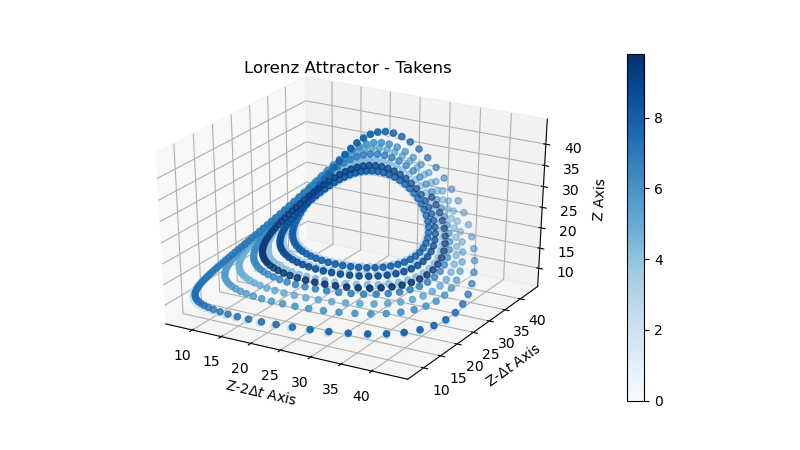

0.10010010010010009


In [91]:
fig = plt.figure(figsize=(8, 4.5))
ax = fig.gca(projection='3d')

dt = 10*t[1]
print(dt)
n = int(dt/t[1])
sc = ax.scatter(z[2*n:], z[n:-n], z[:-2*n], c=t[:-2*n],cmap='Blues')
    
#ax.scatter(x,y,z,c=t,cmap='coolwarm')
ax.set_xlabel("Z-$2\Delta t$ Axis")
ax.set_ylabel("Z-$\Delta t$ Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor - Takens")

plt.colorbar(sc)

In [5]:
def lstsq_opt(x, f, rcond=None):
    x = np.array([x]).T if len(x.shape) <= 1 else x
    f = np.array([f]).T if len(f.shape) <= 1 else f
    A, res, rank, svals = np.linalg.lstsq(x, f, rcond=rcond)
    return A

class RBF():
    def __init__(self, x, f, L, eps):
        x = np.array([x]).T if len(x.shape) <= 1 else x
        self.eps = eps
        self.L = L
        idx = sorted(np.random.choice(len(x), L, replace=False))
        self.xx = x[idx]
        ff = f[idx]
        phi = self._phi(self.xx)
        self.C = lstsq_opt(phi, ff)
    
    def predict(self, x):
        x = np.array([x]) if len(x.shape) <= 1 else x
        phi = self._phi(x)
        return self.C.T@phi
            
    def _phi(self, x):
        phi = np.zeros((self.L,len(x)))
        for i in range(self.L):
            phi[i] = np.exp(-np.linalg.norm(self.xx[i]-x, axis=1)**2/self.eps**2)
        return phi

In [29]:
dt = 5*t[1]
print(dt)
n = int(dt/t[1])
x01 = x[:-3*n]
x02 = x[n:-2*n]
x03 = x[2*n:-n]
x11 = x02
x12 = x03
x13 = x[3*n:]
X0 = np.vstack([x01, x02, x03]).T
X1 = np.vstack([x11, x12, x13]).T
V = X1 - X0

0.03003003003003003


<IPython.core.display.Javascript object>


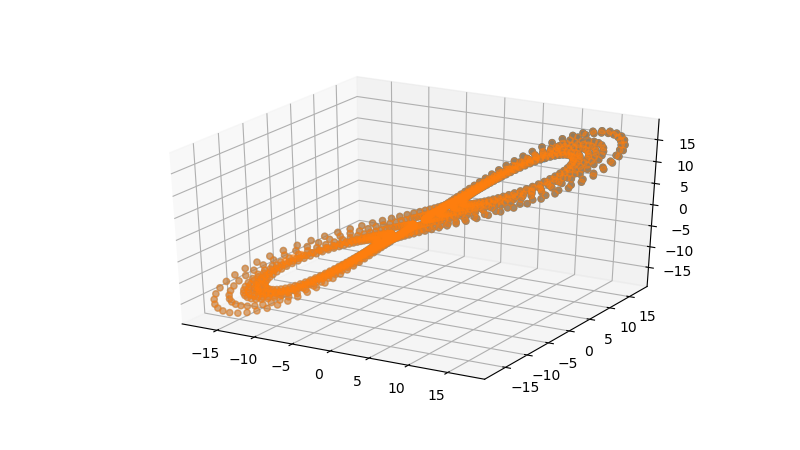

In [30]:
fig = plt.figure(figsize=(8, 4.5))
ax = fig.gca(projection='3d')
ax.scatter(X0[:,0], X0[:,1], X0[:,2])
ax.scatter(X1[:,0], X1[:,1], X1[:,2], alpha=0.5)

<IPython.core.display.Javascript object>


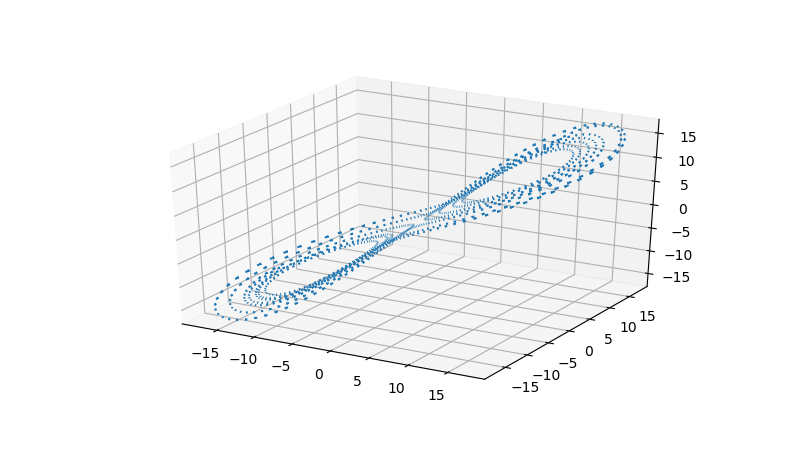

In [31]:
fig = plt.figure(figsize=(8, 4.5))
ax = fig.gca(projection='3d')
plt.quiver(x01, x02, x03, V[:,0], V[:,1], V[:,2],length=0.1,cmap='jet')

In [34]:
rbf = RBF(X0, V, 500, 10)
x0r = np.array([x01[0], x02[0], x03[0]])
soln_rbf = solve_ivp(lambda t, x: rbf.predict(x).T, (0, t_end), x0r, dense_output=True)
xr, yr, zr = soln_rbf.sol(t)

<IPython.core.display.Javascript object>


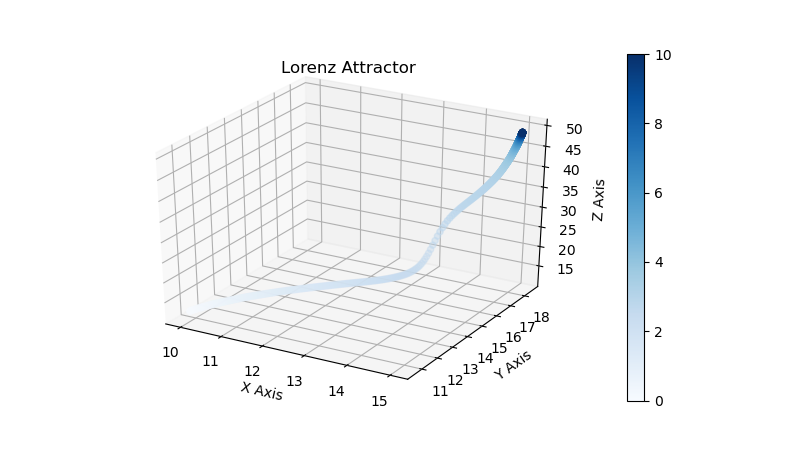

In [35]:
# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig = plt.figure(figsize=(8, 4.5))
ax = fig.gca(projection='3d')

sc = ax.scatter(xr, yr, zr, c=t,cmap='Blues')
    
#ax.scatter(x,y,z,c=t,cmap='coolwarm')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.colorbar(sc)

In [72]:
x0.shape

(3,)